In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import  pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns

In [22]:
from IPython.core.pylabtools import figsize

In [23]:
dataset = pd.read_csv('C:/Users/Shreejan Bhandary/Downloads/Szeged.csv')

In [24]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM

In [25]:
tf.random.set_seed(1234)

In [26]:
dataset.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Precip Type
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,95936.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,0.888342
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,0.314947
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,1.000000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,1.000000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,1.000000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000,1.000000


In [27]:
len(dataset)

96453

In [28]:
df=dataset.iloc[:2000]

In [29]:
train_size = int(len(df)*0.8)
train_dataset, test_dataset = df.iloc[:train_size],df.iloc[train_size:]

In [30]:
print('Dimension of train data: ',train_dataset.shape)
print('Dimension of test data: ', test_dataset.shape)

Dimension of train data:  (1600, 9)
Dimension of test data:  (400, 9)


In [31]:
X_train = train_dataset.drop('Apparent Temperature (C)', axis = 1)
y_train = train_dataset.loc[:,['Apparent Temperature (C)']]

X_test = test_dataset.drop('Apparent Temperature (C)', axis = 1)
y_test = test_dataset.loc[:,['Apparent Temperature (C)']]

In [32]:
scaler_x = MinMaxScaler(feature_range = (0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))
input_scaler = scaler_x.fit(X_train)
output_scaler = scaler_y.fit(y_train)
train_y_norm = output_scaler.transform(y_train)
train_x_norm = input_scaler.transform(X_train)
test_y_norm = output_scaler.transform(y_test)
test_x_norm = input_scaler.transform(X_test)

In [33]:
def create_dataset (X, y, time_steps = 1):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)
TIME_STEPS = 30
X_test, y_test = create_dataset(test_x_norm, test_y_norm,TIME_STEPS)
X_train, y_train = create_dataset(train_x_norm, train_y_norm,TIME_STEPS)
print('X_train.shape: ', X_test.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_train.shape)

X_train.shape:  (370, 30, 8)
y_train.shape:  (1570, 1)
X_test.shape:  (370, 30, 8)
y_test.shape:  (1570, 1)


In [34]:
def create_model(units, m):
    model = Sequential()
    model.add(m (units = units, return_sequences = True,
                input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2))
    model.add(m (units = units))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model
model_lstm = create_model(64, LSTM)

In [35]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,validation_split = 0.2, batch_size = 32,shuffle = False, callbacks = [early_stop])
    return history
history_lstm = fit_model(model_lstm)

Epoch 1/100
40/40 [==============================] - 5s 45ms/step - loss: 0.0446 - val_loss: 0.0343
Epoch 2/100
40/40 [==============================] - 1s 28ms/step - loss: 0.0278 - val_loss: 0.0517
Epoch 3/100
40/40 [==============================] - 1s 28ms/step - loss: 0.0198 - val_loss: 0.0413
Epoch 4/100
40/40 [==============================] - 1s 32ms/step - loss: 0.0141 - val_loss: 0.0351
Epoch 5/100
40/40 [==============================] - 2s 38ms/step - loss: 0.0124 - val_loss: 0.0276
Epoch 6/100
40/40 [==============================] - 1s 30ms/step - loss: 0.0103 - val_loss: 0.0229
Epoch 7/100
40/40 [==============================] - 1s 30ms/step - loss: 0.0097 - val_loss: 0.0190
Epoch 8/100
40/40 [==============================] - 1s 37ms/step - loss: 0.0090 - val_loss: 0.0174
Epoch 9/100
40/40 [==============================] - 1s 33ms/step - loss: 0.0088 - val_loss: 0.0141
Epoch 10/100
40/40 [==============================] - 1s 31ms/step - loss: 0.0078 - val_loss: 0.0131

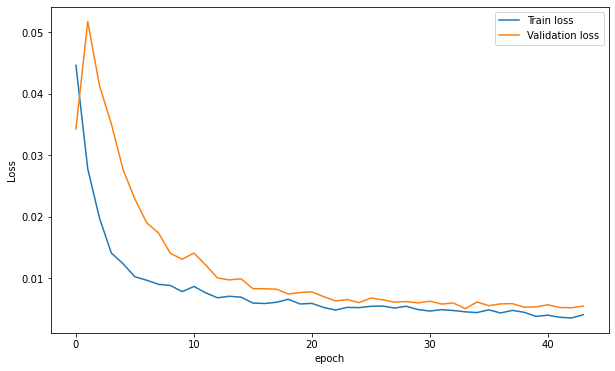

In [36]:
def plot_loss (history):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
plot_loss (history_lstm)

In [37]:
y_test = scaler_y.inverse_transform(y_test)
y_train = scaler_y.inverse_transform(y_train)

In [38]:
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler_y.inverse_transform(prediction)
    return prediction
prediction_lstm = prediction(model_lstm)

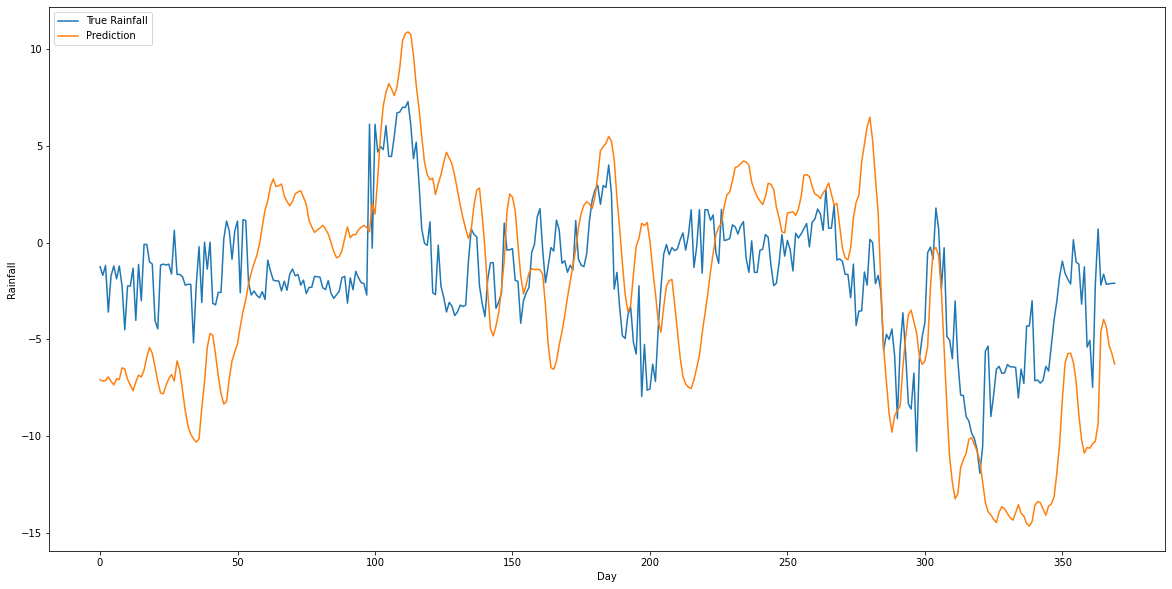

In [39]:
def plot_future(prediction, y_test):
    plt.figure(figsize=(20, 10))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label='True Rainfall')     
    plt.plot(np.arange(range_future),np.array(prediction),
            label='Prediction')
    plt.legend(loc='upper left')
    plt.xlabel('Day')
    plt.ylabel('Rainfall')
plot_future(prediction_lstm, y_test)

In [40]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))

In [41]:
evaluate_prediction(prediction_lstm, y_test, 'LSTM')

LSTM:
Mean Absolute Error: 3.9606
Root Mean Square Error: 4.6498
